# Data Exploration & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/becky/OneDrive/Desktop/gamestop_twitter.csv")
df1 = pd.read_csv("C:/Users/becky/OneDrive/Desktop/gamestop_for_network.csv")

In [2]:
df = df.iloc[:,1:]
df.head()

,Datetime,Tweet Id,Text,Username,user_mention,followersCount,listedCount
0,2021-02-26 23:57:25+00:00,1365450930120839172,This is what the hedgies are loosing to #games...,Tendie_Hunter,NaN,3,0
1,2021-02-26 23:56:24+00:00,1365450676298465288,While significant regulations and new legislat...,SullivanLaw,NaN,1384,134
2,2021-02-26 23:54:28+00:00,1365450187687264256,The regulator has routinely sought to remove m...,eelarson,NaN,2792,134
3,2021-02-26 23:53:35+00:00,1365449966282498049,If you missed out on GameStop Stonk then don’t...,tayloro57712914,NaN,0,0
4,2021-02-26 23:53:12+00:00,1365449869557702660,@barryoleary77 What do you think $AMC #AMC and...,NathanW97552101,barryoleary77,108,0


In [3]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'user_mention',
       'followersCount', 'listedCount'],
      dtype='object')

In [17]:
# check duplicates
df = df.drop_duplicates()


def clean_up(text):
    text = text.lower()
    # remove replied msg
    if 'rt @' in text:
        if len(text.split(": ")) < 2:
            text = text.split(": ")[0]
        else:
            text = text.split(": ")[1]
    # remove the unnecessay URLs
    if "https" in text:
        text = text.split("https")[0]
    if "@" in text:
        text = text.split(" ")
        # remove the strings with symbol @
        text = [j for j in text if '@' not in j]
        text = ' '.join(text)
    # remove hashtag symbols
    if "#" in text:
        text = text.replace("#", "")
    return text

df['clean_tweet'] = df['Text'].map(clean_up)

In [4]:
df1 = df1.iloc[:,1:]
df1.head()

,Datetime,Tweet Id,Text,Username,user_mention,followersCount,listedCount
0,2021-02-26 23:53:12+00:00,1365449869557702660,@barryoleary77 What do you think $AMC #AMC and...,NathanW97552101,barryoleary77,108,0
1,2021-02-26 23:49:20+00:00,1365448897158651905,The #Gamestop momentum might have saved @AMCTh...,PelletThomas,AMCTheatres,332,3
2,2021-02-26 23:47:20+00:00,1365448392113938436,@TradesTrey When are you releasing a new video...,TheDingoMang,TradesTrey,138,5
3,2021-02-26 23:45:06+00:00,1365447832979832832,"Redditors, @RyanCohen Needs Your Help to Send ...",DanBuk4,ryancohen,1389,106
4,2021-02-26 23:45:06+00:00,1365447832979832832,"Redditors, @RyanCohen Needs Your Help to Send ...",DanBuk4,chamath,1389,106


In [5]:
df1.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'user_mention',
       'followersCount', 'listedCount'],
      dtype='object')

In [6]:
# clean the duplicates
count_origin = df1.shape[0]
df1 = df1.drop_duplicates()
print("The original dataset has", count_origin, 'rows of data;\nAfter removing the duplicates, there are',
      df1.shape[0], 'rows of data')

The original dataset has 56838 rows of data;
After removing the duplicates, there are 56218 rows of data


In [7]:
# check any NaN
df1.isnull().values.any()

False

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56218 entries, 0 to 56837
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        56218 non-null  object
 1   Tweet Id        56218 non-null  int64 
 2   Text            56218 non-null  object
 3   Username        56218 non-null  object
 4   user_mention    56218 non-null  object
 5   followersCount  56218 non-null  int64 
 6   listedCount     56218 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.4+ MB


In [9]:
df1.describe()

,Tweet Id,followersCount,listedCount
count,5.621800e+04,5.621800e+04,56218.000000
mean,1.356504e+18,1.435328e+04,126.767530
std,2.975119e+15,2.796844e+05,1108.586404
min,1.342992e+18,0.000000e+00,0.000000
25%,1.354825e+18,5.500000e+01,0.000000
50%,1.355443e+18,2.240000e+02,2.000000
75%,1.356962e+18,1.202000e+03,25.000000
max,1.365450e+18,1.673655e+07,59119.000000


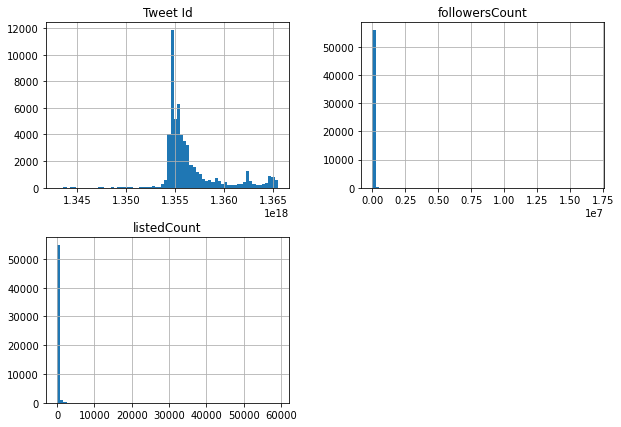

In [10]:
df1.hist(bins=70, figsize=(10,7))
plt.show()

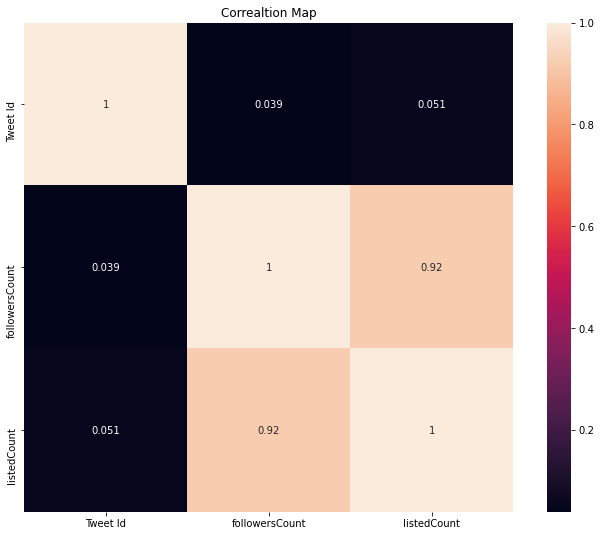

In [11]:
# Correlation
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)
ax.set_title('Correaltion Map')
plt.show()

In [12]:
import networkx as nx

G = nx.DiGraph()
lst=list()
column1=df1['Username']
column2=df1['user_mention']
i=0
for (a,b) in zip(column1, column2):
    
    lst.append((a,b))
    G.add_edges_from(lst)
closeness_centrality=pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index').reset_index()
betweenness_centrality=pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index').reset_index()
degree=pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index').reset_index()

In [13]:
closeness_centrality

,index,0
0,NathanW97552101,0.000000
1,barryoleary77,0.000057
2,PelletThomas,0.000000
3,AMCTheatres,0.003437
4,TheDingoMang,0.000000
...,...,...
35219,Toadsnob,0.000000
35220,UTBOERG,0.000000
35221,Rainbow6Game,0.000028
35222,Y2kCustomPCs,0.000000


In [14]:
df1["closeness_centrality"] = closeness_centrality[0]
df1["betweenness_centrality"] = betweenness_centrality[0]
df1["degree_centrality"] = degree[0]

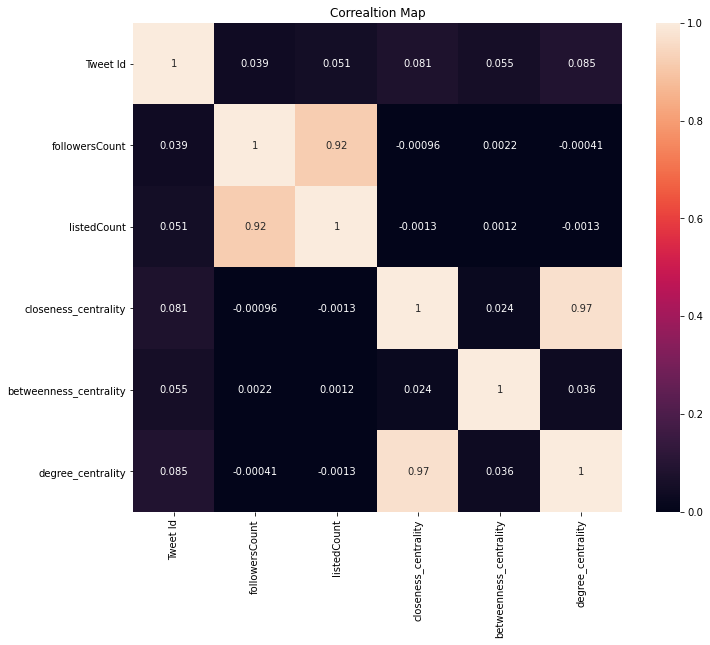

In [15]:
# Correlation'
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)
ax.set_title('Correaltion Map')
plt.show()

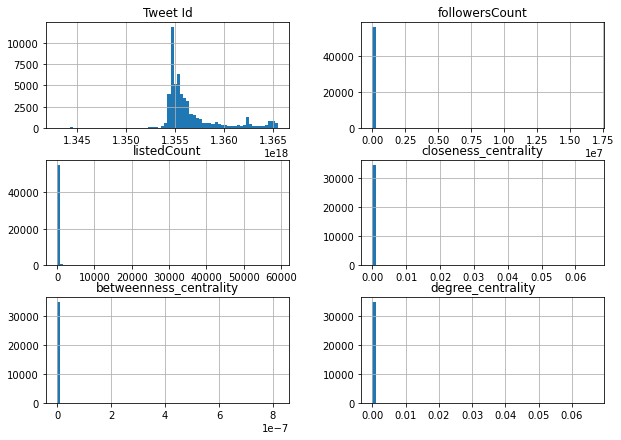

In [16]:
df1.hist(bins=70, figsize=(10,7))
plt.show()